# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing The Data

Here we'll work with the Ecommerece Customers csv file from the company. Which has customer info such as Email, Address, and their Avatar color and other numeric value columns:

* Avg. Session Length: Average session of in-store style advice sessions
* Time on App: Average time spent on App in munites
* Time on Website: Average time spent on Website in minutes
* Length of Membership: for how long the person has been associated with the company as a customer

In [2]:
dataset = pd.read_csv('ecommerce_customers.csv')

# Exploring the Data

In [3]:
dataset.head() #checking the dataframe structure

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [4]:
dataset.info() #checking the datatypes and count of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
dataset.describe() #gettings the stats

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

Let's create some simple plots to checkout the data!

C:\Users\slili\AppData\Local\Temp\ipykernel_35260\3351980964.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Yearly Amount Spent'])


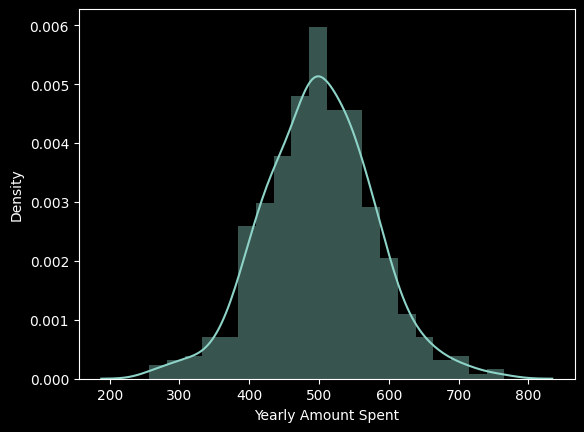

In [6]:
#first let's check the distibution of our target column

plt.style.use('dark_background')
sns.distplot(dataset['Yearly Amount Spent'])
plt.show()

Now, let's use seaborn's pairplot and see which feature is most correlated with our target.

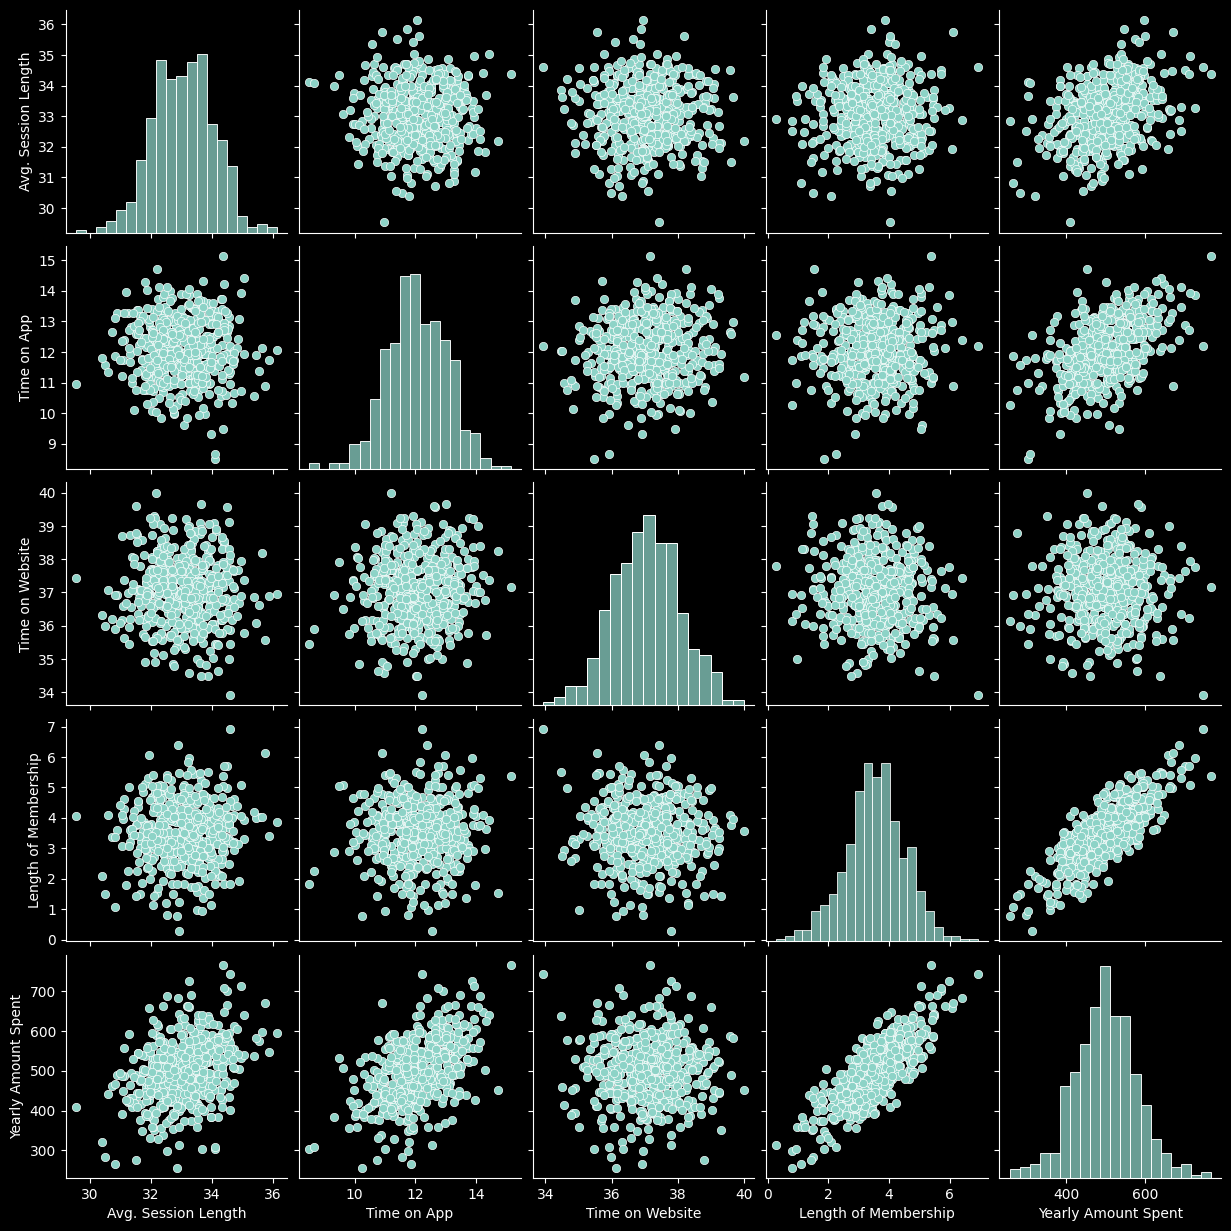

In [7]:
sns.pairplot(dataset)
plt.show()

Which feature do you think has the most correlation with the dependent variable?

The answer is 'Length of Membership'

# Training and Testing the Dataset

Now that we've explored our dataset a bit, let's go ahead and spilt the data into the training set and the test set.

In [8]:
x = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# Predicting the result

In [11]:
y_pred = regressor.predict(x_test)
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[449.07031944, 438.46488066],
       [482.60246733, 489.6618454 ],
       [374.26967454, 370.06954186],
       [513.15311185, 513.8590556 ],
       [502.77107457, 495.69799868],
       [461.7807422 , 450.88726525],
       [466.42119882, 458.01303756],
       [327.37795259, 336.6655623 ],
       [528.22380937, 528.51544919],
       [657.01992394, 663.27832042],
       [571.47103412, 559.42244861],
       [523.63393514, 526.02431274],
       [546.55666686, 552.20571747],
       [467.4278485 , 457.67586182],
       [439.89128048, 450.15607779],
       [445.06218551, 431.65097987],
       [553.99467359, 563.58511617],
       [403.7669021 , 408.35440214],
       [595.80381888, 599.61853988],
       [490.73863214, 486.84826737],
       [712.39632681, 716.65493547],
       [502.0925279 , 496.79327186],
       [398.16346853, 411.49845257],
       [570.45172591, 556.55139426],
       [549.86059046, 551.84576857],
       [392.99225591, 398.18338551],
       [419.93877484, 421.30757507],
 

# Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

7.645674798915311
92.89010304498547
0.9861924261981547


Voila! our r2_score is 98%.

However we don't want to take a chance because our dataset has only 500 observations so we are not sure whether we have been lucky with our model prediction and that the model would continue to give such prediction for future dataset.

We can use k-fold cross validation to check the performance from accross the iterations to determine the average range and the standard deviation.

In [13]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(regressor,x_train,y_train,cv=10)
print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation {:.2f} %'.format(cvs.std()*100))

Accuracy: 98.28 %
Standard Deviation 0.23 %


Again we're getting a very good accuracy and our std is also very low: 0.23%. meaning the distance is somewhere between 98.05% and 98.028. 

So we can conclude the Linear model is the best choice for our dataset.

C:\Users\slili\AppData\Local\Temp\ipykernel_35260\1321108675.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


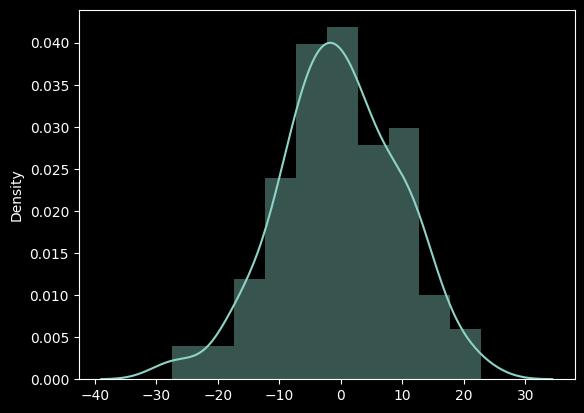

In [14]:
#let's visualize the residuals

sns.distplot((y_test-y_pred))
plt.show()

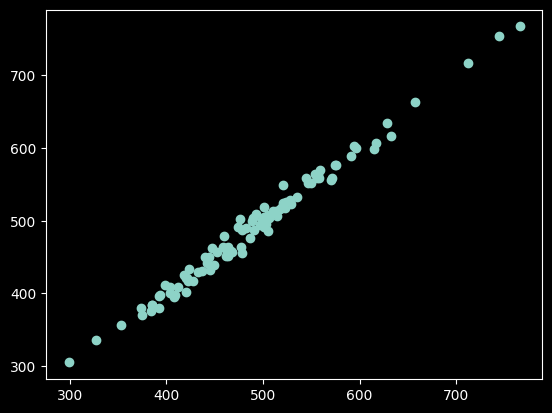

In [15]:
plt.scatter(y_test,y_pred)
plt.show()

In [16]:
regressor.intercept_

-1060.5508096198873

In [17]:
regressor.coef_
pd.DataFrame(data=regressor.coef_,index=['Avg. Session Length','Time on App','Time on Website','Length of Membership'],columns=['Coefficient'])

Coefficient
Avg. Session Length     25.888150
Time on App             38.870465
Time on Website          0.470662
Length of Membership    61.783690

# Interpreting the Coefficient:

* Keeping all the other features fixed, a unit increase in Avg. Session Length is associated with an increase of $ 25.888150

* Keeping all the other features fixed, a unit incerase in Time on App is associated with an increase of $ 38.870465

* Keeping all the other features fixed, a unit increase in Time on Website is associated with an increase of $ 0.470662

* Keeping all the other features fixed, a unit increase in Length of Membership is associated with an increase of $ 61.783690

# Conclusion:

We can conclude that the company should focus it's efforts more on the Mobile App rather than on the Website